# Load data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

ccba = pd.read_csv("dataset\\training_dataset_first\\public_train_x_ccba_full_hashed.csv")
cdtx = pd.read_csv("dataset\\training_dataset_first\\public_train_x_cdtx0001_full_hashed.csv")
custinfo = pd.read_csv("dataset\\training_dataset_first\\public_train_x_custinfo_full_hashed.csv")
dp = pd.read_csv("dataset\\training_dataset_first\\public_train_x_dp_full_hashed.csv")
remit = pd.read_csv("dataset\\training_dataset_first\\public_train_x_remit1_full_hashed.csv")
y = pd.read_csv("dataset\\training_dataset_first\\train_y_answer.csv")
date = pd.read_csv("dataset\\training_dataset_first\\train_x_alert_date.csv")

In [ ]:
cdtx.country.value_counts().plot(kind='pie', autopct='%1.1f%%')


In [ ]:
cdtx.cur_type.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
cdtx[(cdtx['country'] == 130) & (cdtx['cur_type'] == 47)]

In [ ]:
cdtx[(cdtx['country'] == 130) & (cdtx['cur_type'] != 47)]

In [ ]:
cdtx[(cdtx['country'] != 130) & (cdtx['cur_type'] == 47)]

In [ ]:
cdtx[(cdtx['country'] != 130) & (cdtx['cur_type'] != 47)]

---

# Aggegrate cdtx

In [3]:
cdtx_agg = cdtx.groupby(['cust_id','cur_type','country'], as_index=False).amt.mean()

In [4]:
cdtx_agg['sd_amt'] = cdtx.groupby(['cust_id','cur_type','country'], as_index=False).amt.std().amt

In [5]:
cdtx_agg['total_amt'] = cdtx.groupby(['cust_id','cur_type','country'], as_index=False).amt.sum().amt

# cdtx.groupby(['cust_id','cur_type','country'], as_index=False).amt.sum()

In [6]:
cdtx_agg.rename({'amt':'avg_amt'},axis=1, inplace=True)

In [7]:
freq = cdtx.groupby(['cust_id','cur_type','country','date'], as_index=False).count()
freq

,cust_id,cur_type,country,date,amt
0,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,47,130,21,1
1,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,47,130,52,1
2,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,47,130,56,1
3,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,47,130,59,1
4,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,47,130,62,1
...,...,...,...,...,...
455431,ffeb846f2294ec4397f800736dc1e14eb754da5425398d9a3bb81469b764b16f,47,130,358,4
455432,ffeb846f2294ec4397f800736dc1e14eb754da5425398d9a3bb81469b764b16f,47,130,359,1
455433,ffeb846f2294ec4397f800736dc1e14eb754da5425398d9a3bb81469b764b16f,47,130,360,1
455434,ffeb846f2294ec4397f800736dc1e14eb754da5425398d9a3bb81469b764b16f,47,130,361,1


In [8]:
cdtx_agg['avg_freq'] = freq.groupby(['cust_id','cur_type','country'], as_index=False).amt.mean().amt

# freq.groupby(['cust_id','cur_type','country'], as_index=False).amt.mean().amt

In [9]:
cdtx_agg['sd_freq'] = freq.groupby(['cust_id','cur_type','country'], as_index=False).amt.std().amt

# freq.groupby(['cust_id','cur_type','country'], as_index=False).amt.std()

In [10]:
cdtx_agg['total_freq'] = freq.groupby(['cust_id','cur_type','country'], as_index=False).amt.sum().amt

# freq.groupby(['cust_id','cur_type','country'], as_index=False).amt.sum()

In [105]:
tt = cdtx_agg.groupby(['cust_id',	'cur_type',	'country'], as_index=True).sum()

In [108]:
tt.loc[tt.index[0]]

avg_amt        1053.321429
sd_amt         4346.508457
total_amt     88479.000000
avg_freq          1.166667
sd_freq           0.444053
total_freq       84.000000
Name: (0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5, 47, 130), dtype: float64

In [109]:
cdtx_agg

,cust_id,cur_type,country,avg_amt,sd_amt,total_amt,avg_freq,sd_freq,total_freq
0,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,47,130,1053.321429,4346.508457,88479.0,1.166667,0.444053,84
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,47,61,137.500000,50.204581,275.0,1.000000,0.000000,2
2,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,47,118,2836.000000,NaN,2836.0,1.000000,NaN,1
3,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,47,130,13190.844011,27895.057669,4735513.0,2.966942,4.393051,359
4,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,47,130,1985.859223,4189.989740,409087.0,1.401361,0.755436,206
...,...,...,...,...,...,...,...,...,...
11433,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,47,118,1061.000000,0.000000,12732.0,1.000000,0.000000,12
11434,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,47,130,3868.870707,16652.003251,1915091.0,1.860902,1.105481,495
11435,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,47,134,49.666667,20.599353,149.0,1.500000,0.707107,3
11436,ffeb846f2294ec4397f800736dc1e14eb754da5425398d9a3bb81469b764b16f,47,53,486.000000,NaN,486.0,1.000000,NaN,1


---
# Merge to custinfo

In [12]:
## merge to get sar_flag
cust_df = custinfo.merge(y,how='inner')
cust_df

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,sar_flag
0,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bfeb016d17b16f37a8d8,3,12.0,241719.0,3,0
1,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389718e6c99b10041c816,3,13.0,599497.0,6,0
2,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d22c96cf97652e581602,1,19.0,51160.0,4,0
3,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df4eb21131c33fc247a7,3,9.0,3634343.0,6,0
4,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e213b16abaedf6af700,1,17.0,4076287.0,4,0
...,...,...,...,...,...,...,...
23901,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855aa7f79d81390811d914,1,17.0,12207.0,2,0
23902,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a9f715aaa74f38d2419,1,17.0,259985.0,4,0
23903,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c24bb3cbd245eaf8aa16,3,19.0,928963.0,3,0
23904,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42dd8089cffc788b4a9e,3,19.0,21647.0,4,0


In [13]:
## Get rid of duplicate cust_id with multiple sar_flag & alert_key
sorted_cust = cust_df.sort_values(by='sar_flag')
sorted_cust.drop_duplicates(subset=['cust_id'],keep='last', inplace=True, ignore_index=True)

In [14]:
## Find occupation code that sar_flag is truly 0
a = set(sorted_cust[sorted_cust['sar_flag'] == 1].occupation_code.unique())
b = set(sorted_cust[sorted_cust['sar_flag'] == 0].occupation_code.unique())
b - a

{nan, 0.0, 6.0, 7.0, 20.0}

In [15]:
## merge feature from cdtx
df = cdtx_agg.fillna(0).merge(sorted_cust.fillna(20), how='inner')
df.drop(['alert_key'],axis=1,inplace=True)
df

,cust_id,cur_type,country,avg_amt,sd_amt,total_amt,avg_freq,sd_freq,total_freq,risk_rank,occupation_code,total_asset,AGE,sar_flag
0,0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,47,130,1053.321429,4346.508457,88479.0,1.166667,0.444053,84,1,17.0,32758.0,3,0
1,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,47,61,137.500000,50.204581,275.0,1.000000,0.000000,2,3,4.0,629787.0,3,0
2,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,47,118,2836.000000,0.000000,2836.0,1.000000,0.000000,1,3,4.0,629787.0,3,0
3,002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,47,130,13190.844011,27895.057669,4735513.0,2.966942,4.393051,359,3,4.0,629787.0,3,0
4,002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,47,130,1985.859223,4189.989740,409087.0,1.401361,0.755436,206,3,15.0,2126903.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10803,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,47,118,1061.000000,0.000000,12732.0,1.000000,0.000000,12,1,17.0,9705.0,5,0
10804,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,47,130,3868.870707,16652.003251,1915091.0,1.860902,1.105481,495,1,17.0,9705.0,5,0
10805,ffdd3f98b841d4d0ef58ad0d63abddac83ffb5babf973cae4f00fb64ba9b859a,47,134,49.666667,20.599353,149.0,1.500000,0.707107,3,1,17.0,9705.0,5,0
10806,ffeb846f2294ec4397f800736dc1e14eb754da5425398d9a3bb81469b764b16f,47,53,486.000000,0.000000,486.0,1.000000,0.000000,1,1,14.0,458455.0,5,0


---
# Upsampling

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


smote_x = df.loc[:,'cur_type':'AGE']
smote_y = df.loc[:, df.columns == 'sar_flag']

sm = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(smote_x, smote_y, random_state=0)

sm_data_x, sm_data_y = sm.fit_resample(x_train, y_train)

In [17]:
sm_data_x

,cur_type,country,avg_amt,sd_amt,total_amt,avg_freq,sd_freq,total_freq,risk_rank,occupation_code,total_asset,AGE
0,46,53,835.000000,0.000000,835.000000,1.000000,0.000000,1,1,17.000000,5.834860e+05,4
1,47,53,3085.000000,999.848989,6170.000000,1.000000,0.000000,2,1,19.000000,3.229000e+03,3
2,47,130,3095.529412,2861.312464,52624.000000,1.545455,0.820200,17,1,12.000000,7.038080e+05,5
3,19,68,1382.000000,0.000000,1382.000000,1.000000,0.000000,1,1,12.000000,1.710200e+04,2
4,47,119,670.000000,0.000000,670.000000,1.000000,0.000000,1,1,4.000000,2.354910e+05,2
...,...,...,...,...,...,...,...,...,...,...,...,...
15639,46,86,504.016729,0.000000,504.016729,1.000000,0.000000,1,1,10.452601,4.587996e+04,4
15640,46,128,5886.558158,1000.794667,11773.116315,1.400499,0.000000,2,1,13.004993,1.768522e+05,5
15641,47,104,2653.527509,1424.758245,11031.669316,1.352663,0.000000,8,2,18.352663,8.685186e+05,3
15642,45,53,41437.053922,43298.205020,173358.963902,1.126685,0.289488,14,1,14.000000,1.267928e+07,4


---
# Train model XGBoost no RFE

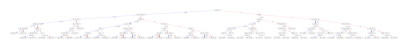

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV
import xgboost as xgb

xgb1 = xgb.XGBClassifier()
xgb1.fit(sm_data_x, sm_data_y)

xgb.plot_tree(xgb1,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]

xgb.plot_importance(xgb1)
plt.rcParams['figure.figsize'] = [5, 5]

plt.show()


0.9981462541549476 0.9715025906735751
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2594
           1       0.77      0.41      0.53       108

    accuracy                           0.97      2702
   macro avg       0.87      0.70      0.76      2702
weighted avg       0.97      0.97      0.97      2702



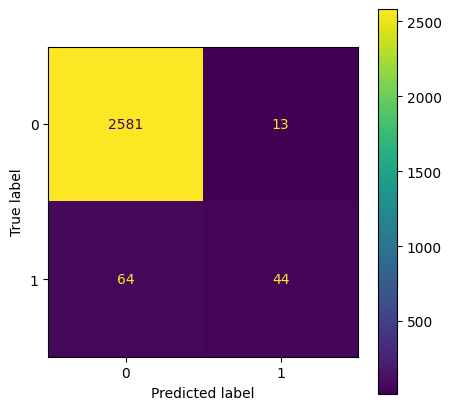

In [50]:
y_train_pred = xgb1.predict(sm_data_x)
y_test_pred = xgb1.predict(x_test)
print(f'{accuracy_score(sm_data_y, y_train_pred)} {accuracy_score(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_test_pred)

---
# Train XGBoost with  RFE

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import xgboost as xgb

xgb2 = xgb.XGBClassifier()
rfe = RFE(xgb2, step=1)
rfe.fit(sm_data_x, sm_data_y.values.ravel())
selected = rfe.get_feature_names_out()

In [58]:
new_x = sm_data_x[selected]
new_y = sm_data_y['sar_flag']

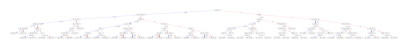

In [64]:
xgb2.fit(new_x, new_y)

xgb.plot_tree(xgb1,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 100]

xgb.plot_importance(xgb1)
plt.rcParams['figure.figsize'] = [5, 5]

plt.show()


0.9904116594221427 0.9696521095484826
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2594
           1       0.64      0.56      0.60       108

    accuracy                           0.97      2702
   macro avg       0.81      0.78      0.79      2702
weighted avg       0.97      0.97      0.97      2702



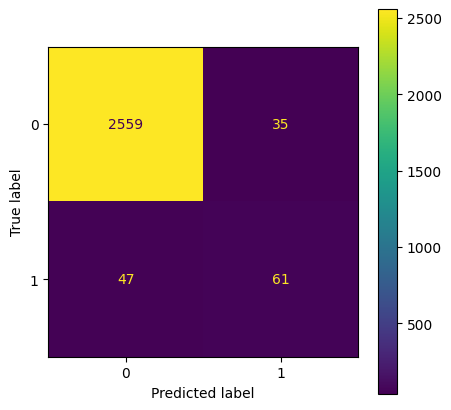

In [67]:
y_train_pred_1 = xgb2.predict(new_x)
y_test_pred_1 = xgb2.predict(x_test[selected])
print(f'{accuracy_score(new_y, y_train_pred_1)} {accuracy_score(y_test, y_test_pred_1)}')
print(classification_report(y_test, y_test_pred_1))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_test_pred_1)

# Make prediction on real test data